In [14]:
import pandas as pd

df = pd.read_csv('MacroTrends_Data_Download_NVDA.csv', skiprows=range(0, 14), parse_dates=['date'])

df

,date,open,high,low,close,volume
0,1999-01-22,0.4018,0.4485,0.3564,0.3767,271468800
1,1999-01-25,0.4066,0.4209,0.3767,0.4161,51048000
2,1999-01-26,0.4209,0.4293,0.3779,0.3838,34320000
3,1999-01-27,0.3851,0.3947,0.3635,0.3827,24436800
4,1999-01-28,0.3827,0.3851,0.3790,0.3815,22752000
...,...,...,...,...,...,...
6318,2024-03-04,841.2609,876.9092,837.1510,852.3303,60527099
6319,2024-03-05,852.7000,860.9700,834.1701,859.6400,51449199
6320,2024-03-06,880.2200,897.2400,870.3001,887.0000,57486354
6321,2024-03-07,901.5800,927.6700,896.0201,926.6900,58662888


In [15]:
date_df = df[['date', 'close']]
date_df

,date,close
0,1999-01-22,0.3767
1,1999-01-25,0.4161
2,1999-01-26,0.3838
3,1999-01-27,0.3827
4,1999-01-28,0.3815
...,...,...
6318,2024-03-04,852.3303
6319,2024-03-05,859.6400
6320,2024-03-06,887.0000
6321,2024-03-07,926.6900


In [16]:
date_df = date_df.set_index('date')

<Axes: title={'center': 'NVIDIA Stock Price'}, xlabel='date'>

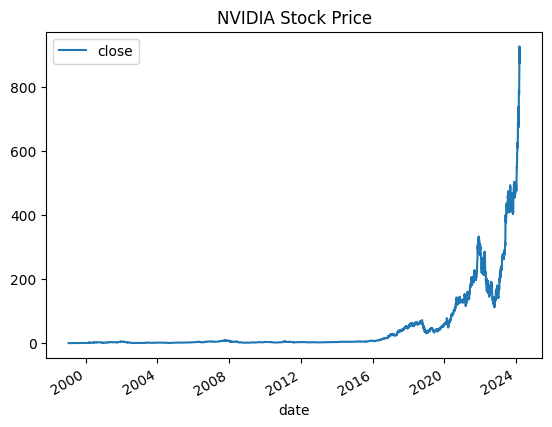

In [26]:
date_df.plot(title='NVIDIA Stock Price')

---

# Tasks for data insights

### 1. Top 5 days with biggest growth

Calculate with Python the dates with the biggest growth difference between two rows in "close" price.
Probably, add a new column to the dataframe and sort by it, descending, showing top 5 dates with the growth number in $.

In [18]:
# Get the difference between `open` and `close` columns
biggest_growth_df = df.copy()
biggest_growth_df['growth'] = biggest_growth_df['close'] - biggest_growth_df['open']
biggest_growth_df = biggest_growth_df.sort_values('growth', ascending=False)
# biggest_growth_df = biggest_growth_df[['date', 'growth']]
biggest_growth_df['growth'] = biggest_growth_df['growth'].apply(lambda x: f"${x:.2f}")
biggest_growth_df.head(5)

,date,open,high,low,close,volume,growth
6311,2024-02-22,750.2151,785.7134,742.1655,785.3435,85075330,$35.13
6179,2023-08-14,404.7720,437.9048,403.0224,437.4349,67535798,$32.66
6280,2024-01-08,495.0970,522.7257,494.7670,522.5057,62965777,$27.41
5811,2022-02-24,209.8553,237.6662,208.6070,237.1469,73038186,$27.29
5735,2021-11-04,271.8735,313.1703,270.7652,297.5542,115053013,$25.68


In [19]:
# Display biggest decline
biggest_growth_df.tail(5)

,date,open,high,low,close,volume,growth
6185,2023-08-22,481.2454,481.7652,453.2324,456.5807,74938827,$-24.66
6309,2024-02-20,719.4365,719.5265,677.3085,694.4877,69558878,$-24.95
5764,2021-12-16,311.0831,311.1630,280.5360,283.4719,70368255,$-27.61
6187,2023-08-24,502.0508,502.5507,471.4875,471.5275,114332956,$-30.52
6322,2024-03-08,951.3790,974.0000,865.0600,875.2800,111177168,$-76.10


 ---

### 2. Compare to AMD and Apple

Now, draw a chart with AMD and Apple stock prices added to the same chart.

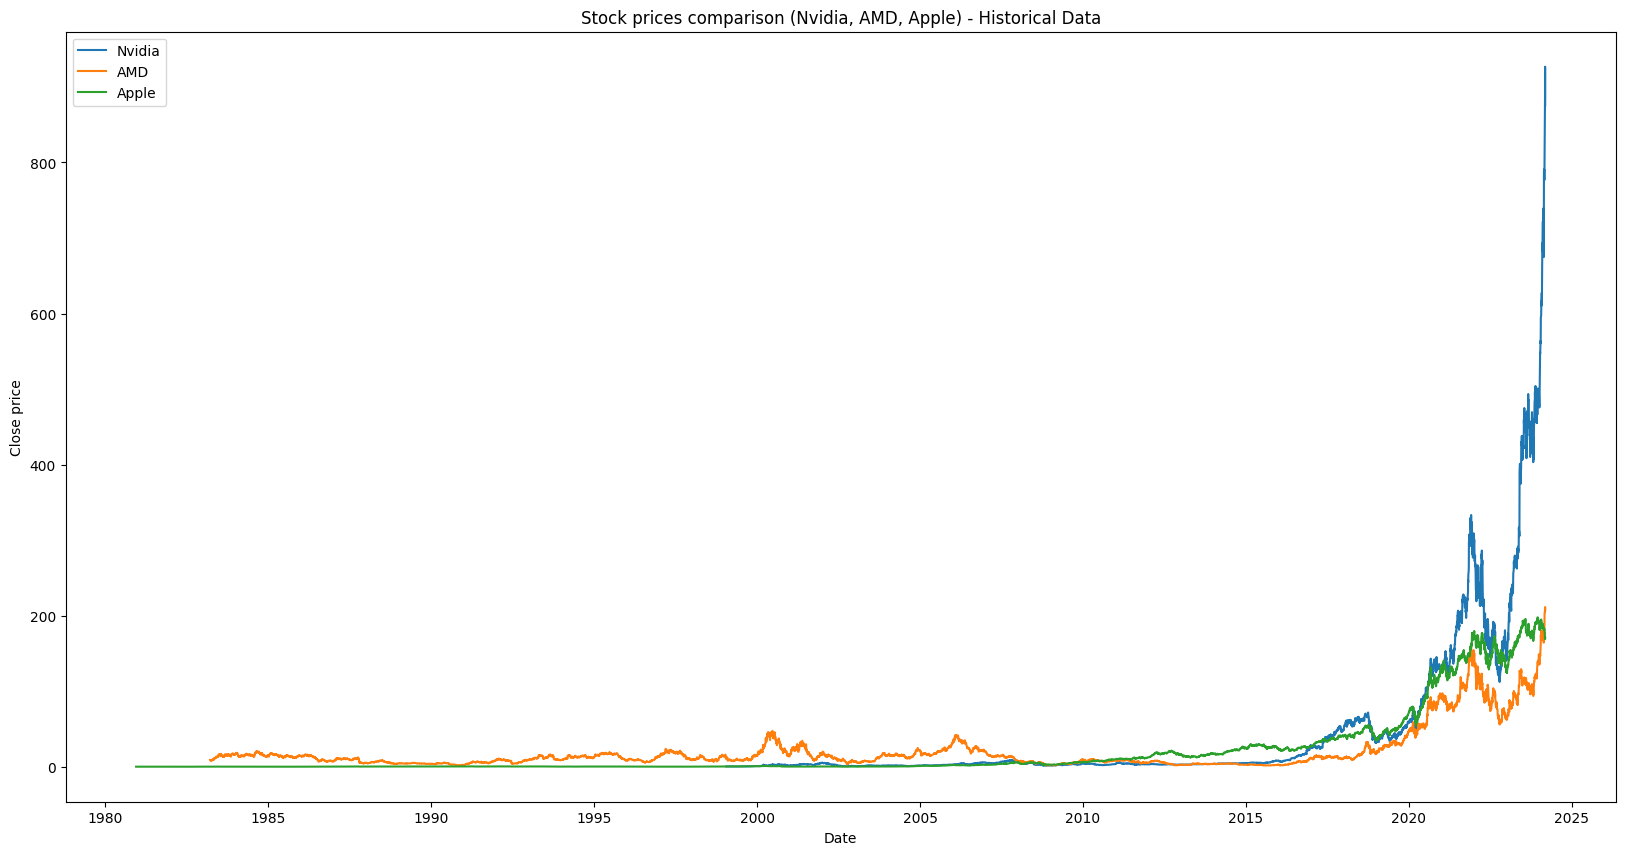

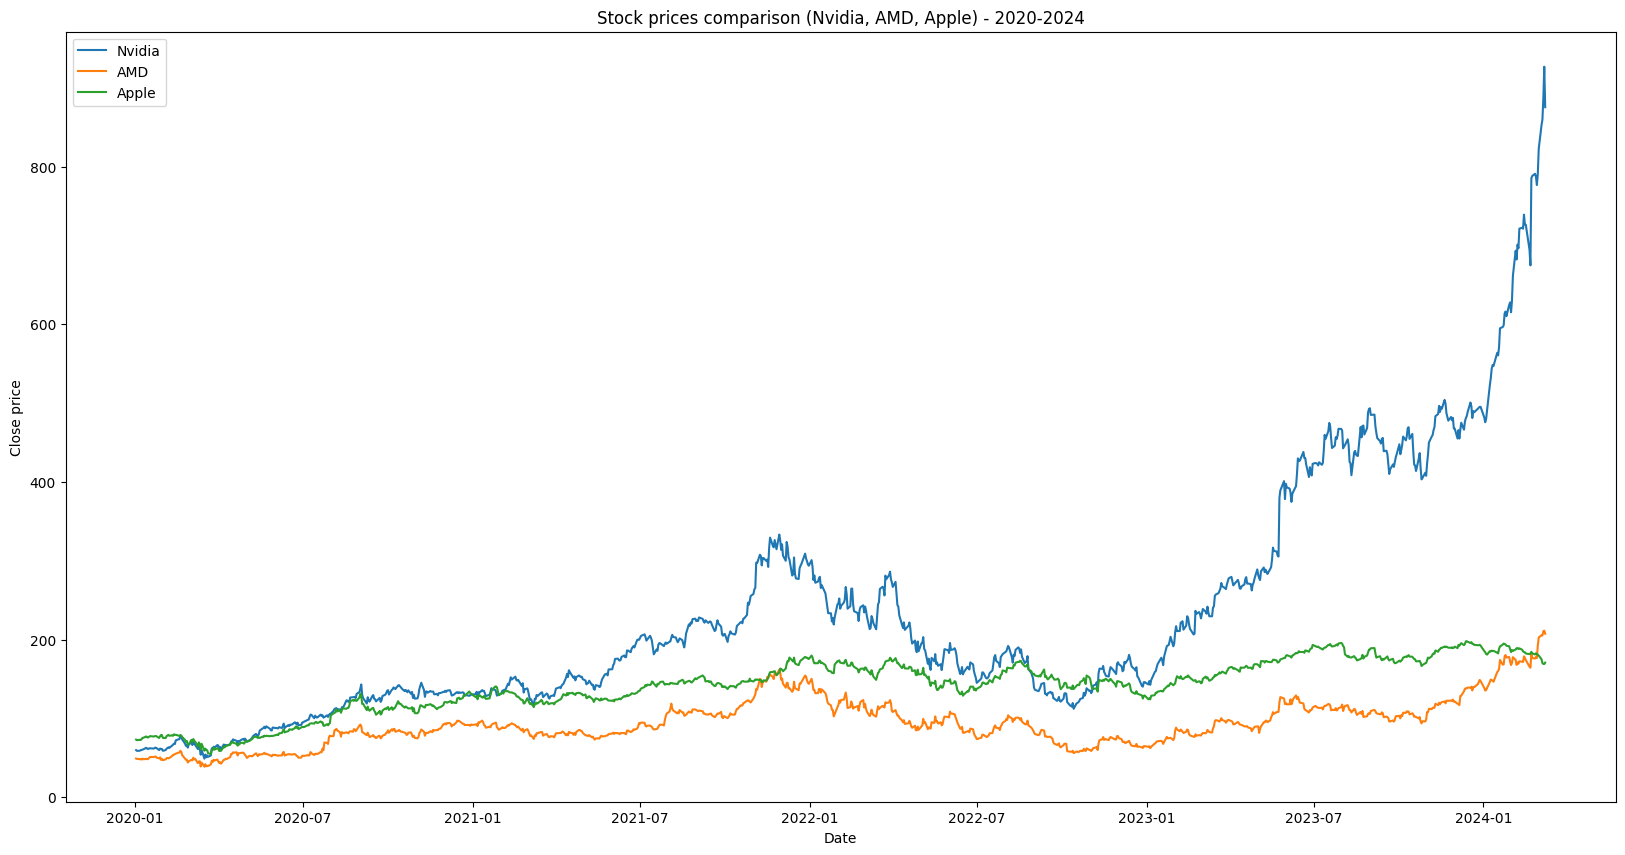

In [24]:
nvidia_df = df.copy()
amd_df = pd.read_csv('MacroTrends_Data_Download_AMD.csv', skiprows=range(0, 14), parse_dates=['date'])
apple_df = pd.read_csv('MacroTrends_Data_Download_AAPL.csv', skiprows=range(0, 14), parse_dates=['date'])

import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plt.title('Stock prices comparison (Nvidia, AMD, Apple) - Historical Data')
plt.xlabel('Date')
plt.ylabel('Close price')
plt.plot(nvidia_df['date'], nvidia_df['close'], label='Nvidia')
plt.plot(amd_df['date'], amd_df['close'], label='AMD')
plt.plot(apple_df['date'], apple_df['close'], label='Apple')
plt.legend()

plt.figure(figsize=(20, 10))
plt.title('Stock prices comparison (Nvidia, AMD, Apple) - 2020-2024')
plt.xlabel('Date')
plt.ylabel('Close price')
nvidia_filtered_df = nvidia_df[nvidia_df['date'] >= '2020-01-01']
amd_filtered_df = amd_df[amd_df['date'] >= '2020-01-01']
apple_filtered_df = apple_df[apple_df['date'] >= '2020-01-01']
plt.plot(nvidia_filtered_df['date'], nvidia_filtered_df['close'], label='Nvidia')
plt.plot(amd_filtered_df['date'], amd_filtered_df['close'], label='AMD')
plt.plot(apple_filtered_df['date'], apple_filtered_df['close'], label='Apple')
plt.legend()



---

### 3. Interactivity: Plotly

Create a separate web page in the repository which would open as HTML and would show the same chart but with interactivity:

- Hover over some date and see the price for that date, for all three Nvidia/Apple/AMD
- Filter "All time", "Last year", "Last month"

In [25]:
import datetime
import plotly.express as px

today = datetime.date.today()
first = today.replace(day=1)
last_month = first - datetime.timedelta(days=1)

fig = px.line(title='Stock prices comparison (Nvidia, AMD, Apple)')
fig.add_scatter(x=nvidia_filtered_df['date'], y=nvidia_filtered_df['close'], mode='lines', name='Nvidia')
fig.add_scatter(x=amd_filtered_df['date'], y=amd_filtered_df['close'], mode='lines', name='AMD')
fig.add_scatter(x=apple_filtered_df['date'], y=apple_filtered_df['close'], mode='lines', name='Apple')
fig.update_layout(hovermode="x unified")  # Show all data on hover
# Add date range slider
fig.update_layout(xaxis_rangeslider_visible=True)
# Add date range buttons
fig.update_layout(
    updatemenus=[
        dict(
            buttons=list([
                dict(label="All time",
                     method="relayout",
                     args=["xaxis.range", [None, None]]),
                dict(label="Last year",
                     method="relayout",
                     args=["xaxis.range", ['2023-01-01', '2024-01-01']]),
                dict(label="Last month",
                     method="relayout",
                     args=["xaxis.range", [last_month.strftime("%Y-%m-01"), last_month.strftime("%Y-%m-%d")]]),
            ]),
            direction="down",
            showactive=True,
            xanchor="right",
            yanchor="top"
        ),
    ]
)
fig.show()

fig.write_html('./chart.html')


In [ ]:
pip show plotly

---

### 6. Bonus: Biggest stock jumps in a day

Check the statistics and look for days when stocks jumped the most. This can be tied with a quick google to see what happened that day (for example, AI tool launched, GPU was announced etc.).

We could display this as a chart or table, then add the missing details for analysis.

In [ ]:
daily_nvidia_jumps_df = df.copy(deep=True)
daily_amd_jumps_df = amd_df.copy(deep=True)
daily_apple_jumps_df = apple_df.copy(deep=True)

daily_nvidia_jumps_df['jump'] = daily_nvidia_jumps_df['close'] - daily_nvidia_jumps_df['open']
daily_amd_jumps_df['jump'] = daily_amd_jumps_df['close'] - daily_amd_jumps_df['open']
daily_apple_jumps_df['jump'] = daily_apple_jumps_df['close'] - daily_apple_jumps_df['open']

daily_nvidia_jumps_df = daily_nvidia_jumps_df[daily_nvidia_jumps_df['date'] >= '2015-01-01']
daily_amd_jumps_df = daily_amd_jumps_df[daily_amd_jumps_df['date'] >= '2015-01-01']
daily_apple_jumps_df = daily_apple_jumps_df[daily_apple_jumps_df['date'] >= '2015-01-01']

# Filter out the days with 0 jump
daily_nvidia_jumps_df = daily_nvidia_jumps_df[daily_nvidia_jumps_df['jump'] != 0]
daily_amd_jumps_df = daily_amd_jumps_df[daily_amd_jumps_df['jump'] != 0]
daily_apple_jumps_df = daily_apple_jumps_df[daily_apple_jumps_df['jump'] != 0]

# Find and print biggest jumps (positive and negative)
print('Nvidia biggest jumps:')
print(daily_nvidia_jumps_df.nlargest(5, 'jump'))
print('Nvidia biggest declines:')
print(daily_nvidia_jumps_df.nsmallest(5, 'jump'))

print('AMD biggest jumps:')
print(daily_amd_jumps_df.nlargest(5, 'jump'))
print('AMD biggest declines:')
print(daily_amd_jumps_df.nsmallest(5, 'jump'))

print('Apple biggest jumps:')
print(daily_apple_jumps_df.nlargest(5, 'jump'))
print('Apple biggest declines:')
print(daily_apple_jumps_df.nsmallest(5, 'jump'))

# Display Chart
fig = px.line(title='Stock price changes (Nvidia, AMD, Apple) - 2015-2024')
fig.add_scatter(x=daily_nvidia_jumps_df['date'], y=daily_nvidia_jumps_df['jump'], mode='lines', name='Nvidia')
fig.add_scatter(x=daily_amd_jumps_df['date'], y=daily_amd_jumps_df['jump'], mode='lines', name='AMD')
fig.add_scatter(x=daily_apple_jumps_df['date'], y=daily_apple_jumps_df['jump'], mode='lines', name='Apple')
fig.update_layout(hovermode="x unified")  # Show all data on hover
fig.update_layout(xaxis_rangeslider_visible=True)
fig.show()